# 次元削減

In [6]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 可視化

In [20]:
from sklearn.datasets import load_wine
wine_data = load_wine()

print(wine_data.DESCR)
print(wine_data.feature_names)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [9]:
df_X = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df_y = pd.DataFrame(data=wine_data.target, columns=["wine class"])

df_X.head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0  
5                          2.85   1450.0  
6                          3.58   1290.0  
7                          3.58   1295.0  
8                          2.85   1045.0  
9                          3.55   1045.0

In [14]:
def my_mesh(model, X, y):
    model.fit(X,y)
    x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    result_all_mesh=model.predict(np.array([xx.reshape(-1), yy.reshape(-1)]).T)
    result_all_mesh = result_all_mesh.reshape(xx.shape)

    plt.pcolormesh(xx, yy, result_all_mesh, cmap=plt.cm.Accent)
    plt.scatter(X[:,0], X[:, 1], c=y, edgecolors='K', cmap=plt.cm.Accent)
    plt.show()


# 便利関数
def my_scatter(df_X, target, name1, name2):    
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.scatter(df_X[name1], df_X[name2], c=target, cmap=plt.cm.Vega10)


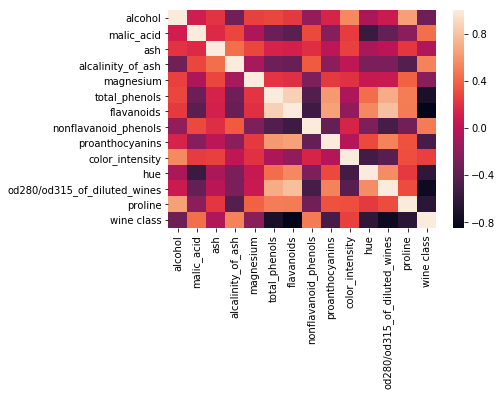

In [15]:
df_all=pd.concat([df_X, df_y], axis=1)

sns.heatmap(df_all.corr())

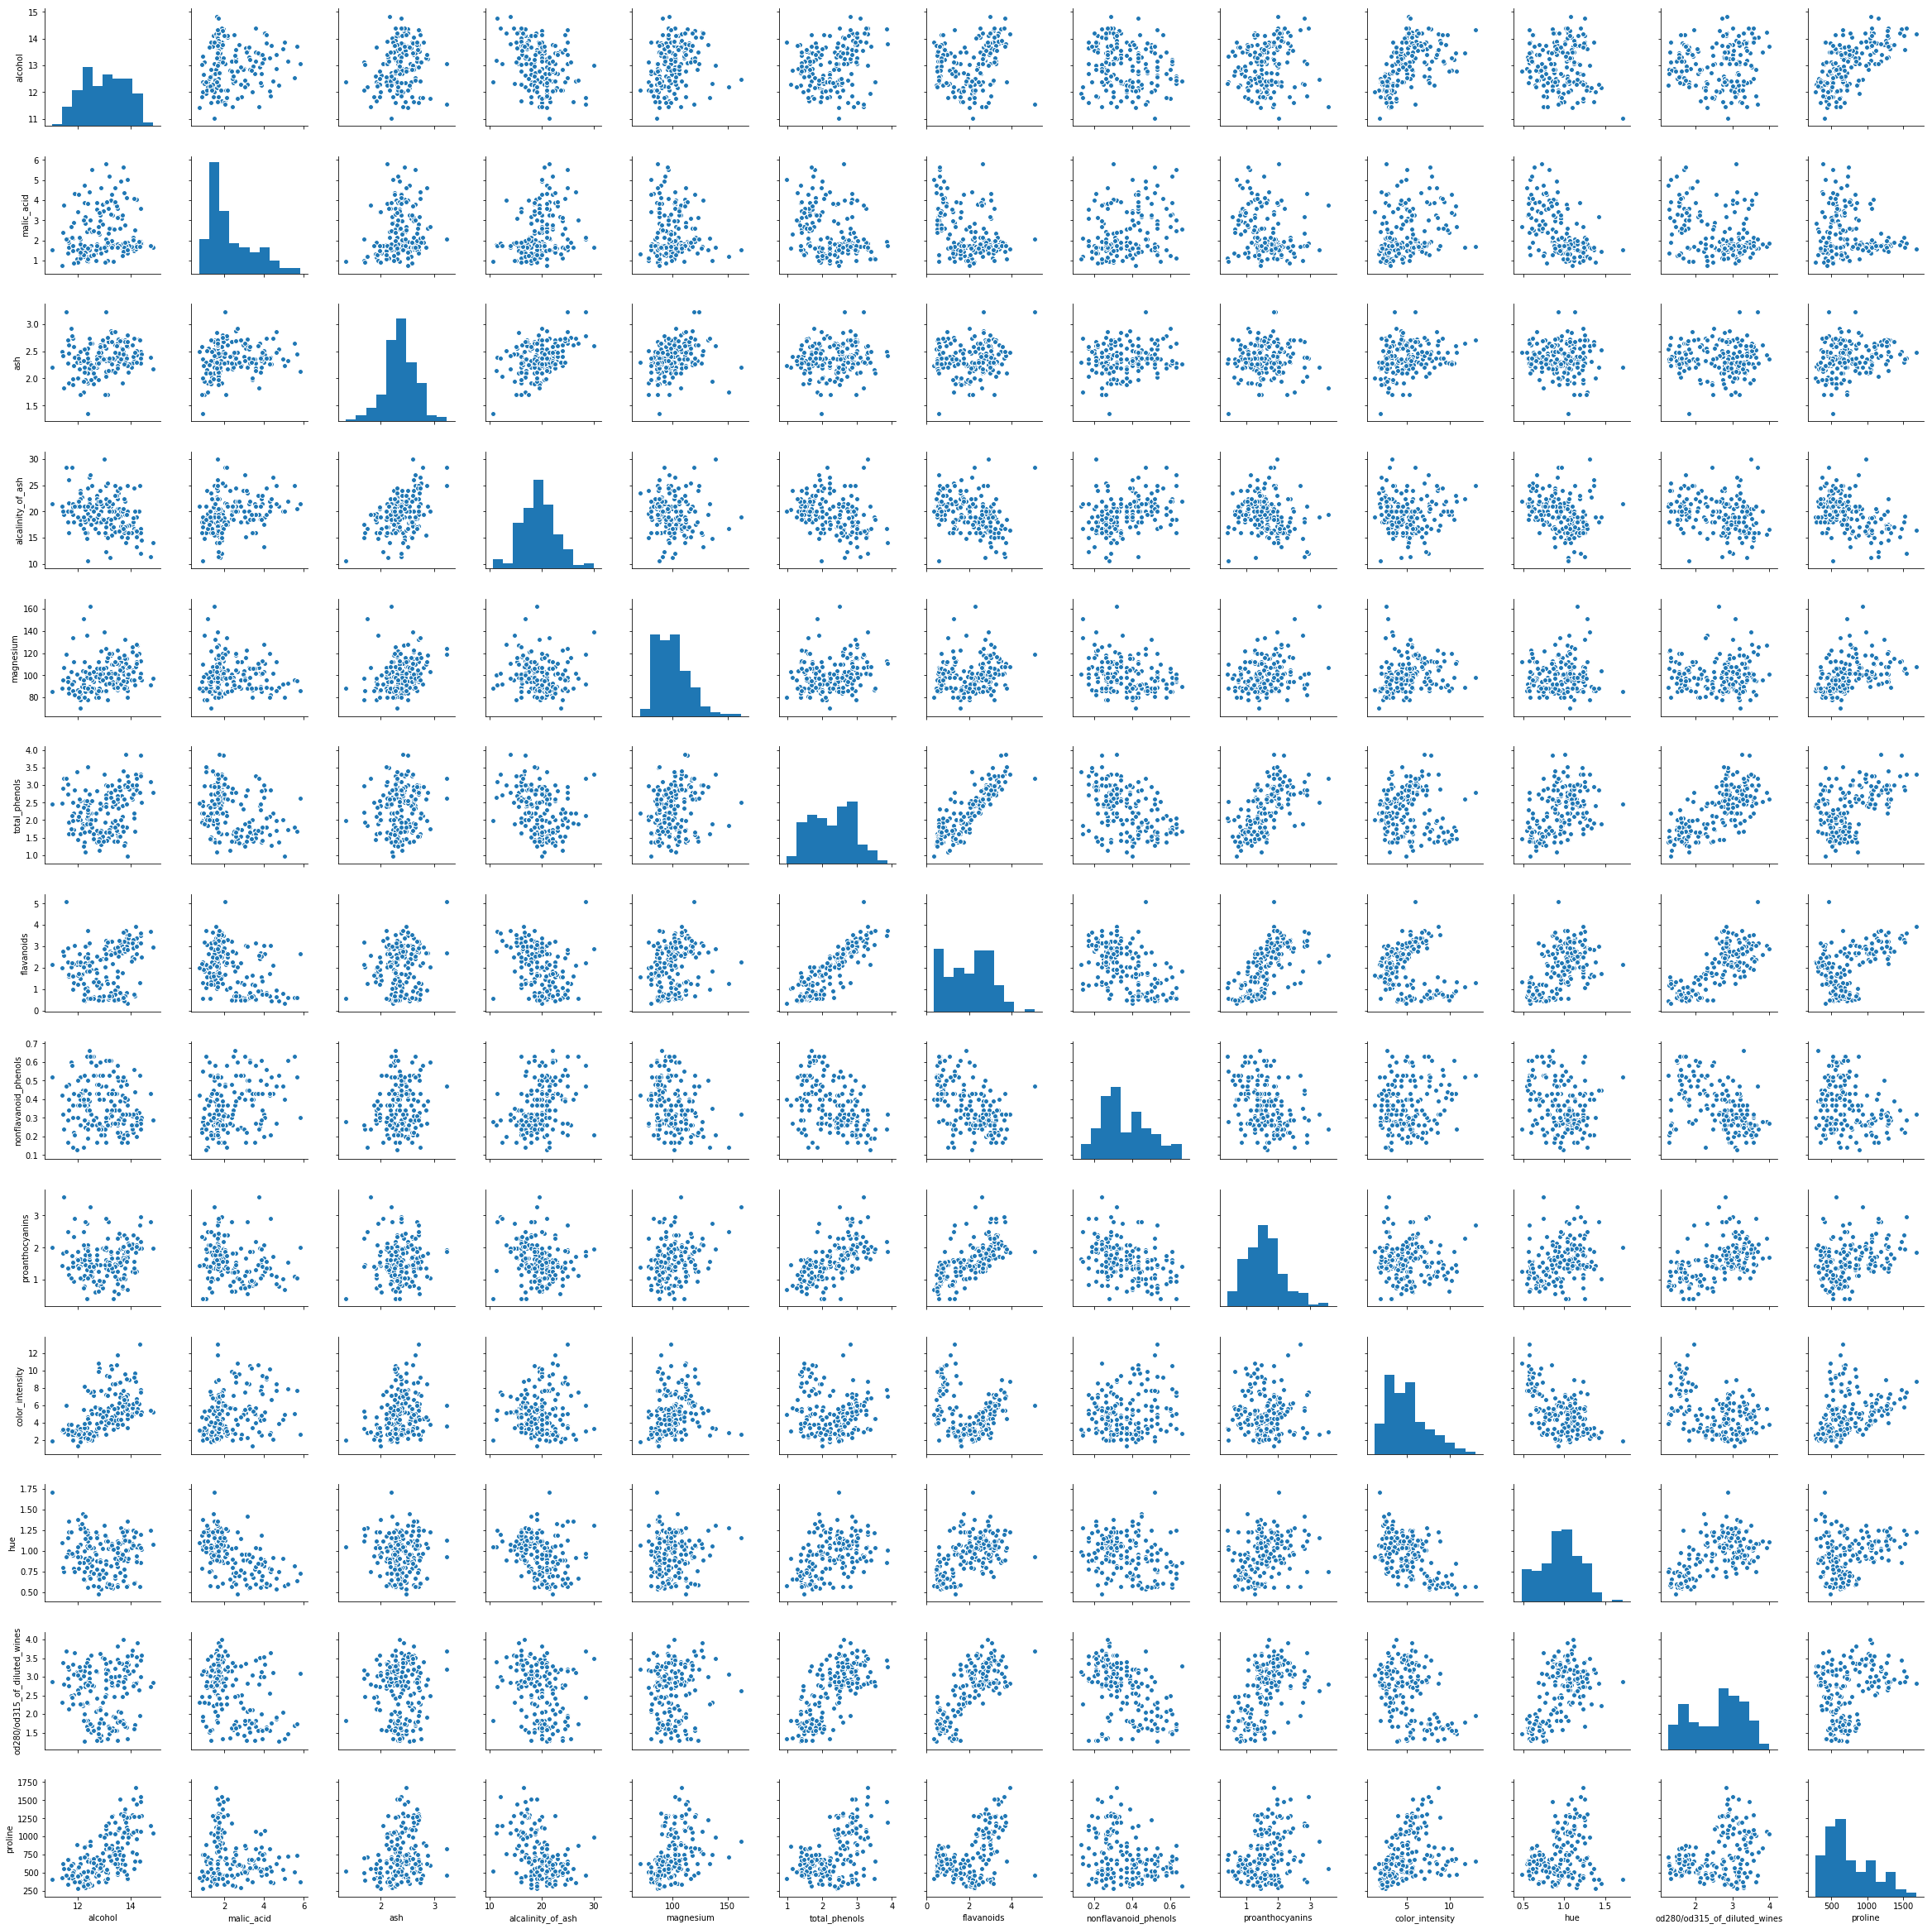

In [16]:
sns.pairplot(df_X)

In [33]:
print(df_all.keys)

<bound method NDFrame.keys of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
5      14.20        1.76  2.45               15.2      112.0           3.27   
6      14.39        1.87  2.45               14.6       96.0           2.50   
7      14.06        2.15  2.61               17.6      121.0           2.60   
8      14.83        1.64  2.17               14.0       97.0           2.80   
9      13.86        1.35  2.27               16.0       98.0           2.98   
10     14.10        2.16  2.30               18.0      105.0           2.95   
11     14.12        1.

KeyError: 'proline'

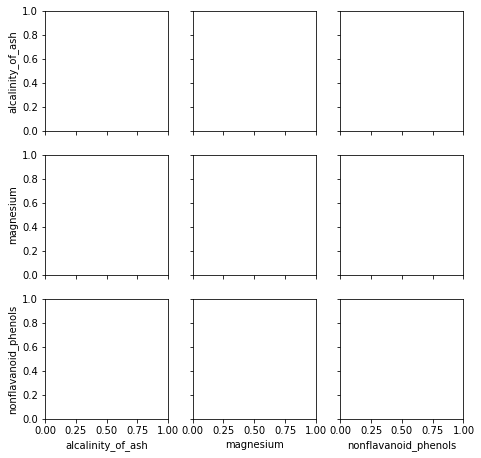

In [35]:
sns.pairplot(df_all.loc[:,['alcalinity_of_ash','magnesium',"nonflavanoid_phenols"]], "proline")


## PCA

In [18]:
from sklearn.decomposition import PCA

X_reduced= PCA(n_components=2).fit_transform(df_X.iloc[:,[3,5,6,7,11]])

print(X_reduced)

[[-4.09536559e+00  1.02590671e+00]
 [-8.36254596e+00 -1.86046759e-01]
 [-1.10119354e+00  1.25516925e+00]
 [-3.00090930e+00  1.75750555e+00]
 [ 1.35324792e+00  1.09287865e+00]
 [-4.48855984e+00  8.93033865e-01]
 [-4.97567338e+00  1.76023217e-01]
 [-2.01665423e+00  6.70328817e-01]
 [-5.59436890e+00  2.03485234e-01]
 [-3.69885937e+00  1.05552554e+00]
 [-1.71495084e+00  1.29127166e+00]
 [-2.71971443e+00 -4.98216239e-02]
 [-3.58167027e+00  2.83538535e-01]
 [-8.25823685e+00  3.99433211e-01]
 [-7.69329065e+00  6.77264050e-01]
 [-2.42921584e+00  6.76648312e-01]
 [ 3.29738096e-01  1.14204225e+00]
 [ 2.95056418e-01  1.35853147e+00]
 [-3.26836818e+00  1.49320278e+00]
 [-4.44392256e+00  6.33180597e-01]
 [-3.71314117e+00  1.15556111e+00]
 [-1.00046371e+00  6.40480488e-01]
 [-3.07843812e+00  1.00201040e+00]
 [-1.79831779e+00  5.71310824e-01]
 [ 3.31167626e-01  1.19916828e+00]
 [ 5.30154770e+00  1.75105838e+00]
 [-3.54220453e+00  6.93373745e-01]
 [-2.50367638e+00 -1.36105657e-01]
 [-3.03383561e-01  1

In [ ]:
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c=wine_)